# Problem statement
The dataset attached contains the data of 160 different bags associated with ABC industries. The bags have certain attributes which are described below:

Height – The height of the bag
Width – The width of the bag
Length – The length of the bag
Weight – The weight the bag can carry
Weight1 – Weight the bag can carry after expansion
Color - Color of the Bag
The company now wants to predict the cost they should set for a new variant of these kinds of bags based on the attributes . As a result, they want you to build a prediction model which can correctly set the cost of the bag provided the attributes are given.

# Solutions

# Imports required libraries
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline.

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

# Get the Data
We'll work with the Luggage Bags Cost Prediction data csv file It has cost weight length height width color ** Read in the Luggage Bags Cost Prediction csv file as a DataFrame called df

In [2]:
df = pd.read_csv("AIML_C7_April 2022_Data_miniproject.csv")


# Solution Task 1: Analyse the dataset and do EDA (Exploratory Data Analysis)
1.1 : Understand data using methods like head(), describe() and info()

In [3]:
df.columns

df.head()
print(df)

      Cost Weight Weight1 Length   Height   Width   Color
0    242.0   23.2    25.4     30  11.5200    4.02   Green
1    290.0     24    26.3   31.2  12.4800  4.3056     Red
2    340.0   23.9    26.5   31.1  12.3778  4.6961  Yellow
3    363.0   26.3      29   33.5  12.7300  4.4555   Green
4    430.0   26.5      29  34.25  12.4440   5.134     Red
..     ...    ...     ...    ...      ...     ...     ...
154   12.2   11.5    12.2   13.4   2.0904  1.3936     Red
155   13.4   11.7    12.4   13.5   2.4300   1.269  Yellow
156   12.2   12.1      13   13.8   2.2770  1.2558   Green
157   19.7   13.2    14.3   15.2   2.8728  2.0672     Red
158   19.9   13.8      15   16.2   2.9322  1.8792  Yellow

[159 rows x 7 columns]


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Cost       159 non-null float64
Weight     159 non-null object
Weight1    159 non-null object
Length     159 non-null object
Height     158 non-null float64
Width      158 non-null object
Color      159 non-null object
dtypes: float64(2), object(5)
memory usage: 8.8+ KB


In [5]:
# Generate descriptive statistics.
# Checking Min, Max, Mean, Std for all the columns
df.describe(percentiles=[.10, .25, .5, .75])

,Cost,Height
count,159.000000,158.000000
mean,398.326415,8.933124
std,357.978317,4.273069
min,0.000000,1.728400
10%,29.580000,3.735200
25%,120.000000,5.940600
50%,273.000000,7.733000
75%,650.000000,12.248700
max,1650.000000,18.957000


1.2 : Checking is there any null values

In [6]:
# checking column wise null values
df.isnull().any()

Cost       False
Weight     False
Weight1    False
Length     False
Height      True
Width       True
Color      False
dtype: bool

In [7]:
# checking column wise null value count
df.isnull().any()
df.isnull().sum()

Cost       0
Weight     0
Weight1    0
Length     0
Height     1
Width      1
Color      0
dtype: int64

In [8]:
# checking overall null value count
df.isnull().sum().sum()

2

In [9]:
df = df.dropna(how='any',axis=0)
print(df)

      Cost Weight Weight1 Length   Height   Width   Color
0    242.0   23.2    25.4     30  11.5200    4.02   Green
1    290.0     24    26.3   31.2  12.4800  4.3056     Red
2    340.0   23.9    26.5   31.1  12.3778  4.6961  Yellow
3    363.0   26.3      29   33.5  12.7300  4.4555   Green
4    430.0   26.5      29  34.25  12.4440   5.134     Red
..     ...    ...     ...    ...      ...     ...     ...
154   12.2   11.5    12.2   13.4   2.0904  1.3936     Red
155   13.4   11.7    12.4   13.5   2.4300   1.269  Yellow
156   12.2   12.1      13   13.8   2.2770  1.2558   Green
157   19.7   13.2    14.3   15.2   2.8728  2.0672     Red
158   19.9   13.8      15   16.2   2.9322  1.8792  Yellow

[157 rows x 7 columns]


In [10]:
# checking overall null value count
df.isnull().sum().sum()

0

# Now we can see all null value is removed

# As Color column contains string values so we will convert into numeric format¶

In [11]:
df['Color'].unique()

array(['Green', 'Red', 'Yellow'], dtype=object)

In [12]:
# As we have three different colors so we will convert it into number
df['Color'].replace(['Green', 'Red', 'Yellow'], [0.0, 1.0, 2.0], inplace=True)

# Checking for Special Chars in various coloumns

In [13]:
# Checking for special char in Weight coloumn
print(df[df.Weight.str.contains(r'[U#&$]')])


     Cost Weight  Weight1 Length   Height   Width  Color
9   500.0      #  30.15.7   36.2  14.2266  4.9594    0.0
49  161.0      &     23.4   26.7   6.9153  3.6312    1.0


In [14]:
# Checking for special char in Length coloumn
print(df[df.Length.str.contains(r'[U#&$]')])



     Cost Weight Weight1 Length  Height   Width  Color
56  270.0   24.1    26.5      $  8.1454  4.2485    2.0


In [15]:
# Checking for special char in Width coloumn
print(df[df.Width.str.contains(r'[U#&$]')])

    Cost Weight Weight1   Length   Height Width  Color
5  450.0   26.8      29  34.25.7  13.6024     U    2.0


We can see 4 coloumn has special char, we need to remove this outliers

# Dropping All Special Characters from coloumns

In [16]:

print(df.drop(df[df.Weight.str.contains(r'[U#&$]') | df.Width.str.contains(r'[U#&$]') 
                 | df.Length.str.contains(r'[U#&$]')].index))


      Cost Weight Weight1 Length   Height   Width  Color
0    242.0   23.2    25.4     30  11.5200    4.02    0.0
1    290.0     24    26.3   31.2  12.4800  4.3056    1.0
2    340.0   23.9    26.5   31.1  12.3778  4.6961    2.0
3    363.0   26.3      29   33.5  12.7300  4.4555    0.0
4    430.0   26.5      29  34.25  12.4440   5.134    1.0
..     ...    ...     ...    ...      ...     ...    ...
154   12.2   11.5    12.2   13.4   2.0904  1.3936    1.0
155   13.4   11.7    12.4   13.5   2.4300   1.269    2.0
156   12.2   12.1      13   13.8   2.2770  1.2558    0.0
157   19.7   13.2    14.3   15.2   2.8728  2.0672    1.0
158   19.9   13.8      15   16.2   2.9322  1.8792    2.0

[153 rows x 7 columns]


In [17]:
#Decribing dra after removing special chars
df.describe()

,Cost,Height,Color
count,157.000000,157.000000,157.000000
mean,399.517197,8.976036,0.993631
std,358.554199,4.252453,0.820388
min,0.000000,1.728400,0.000000
25%,120.000000,5.953200,0.000000
50%,273.000000,7.786000,1.000000
75%,650.000000,12.354000,2.000000
max,1650.000000,18.957000,2.000000


As data type of column Weight, Weight1, Length, Width are numerical data points but there data type is object in dataframe. It means this columns contains some non numerical data point which may got inserted by mistake. So if we try to convert this columns into numberic then we will get exceptions. To avoid it we will supress error using errors='coerce' and convert this columns to numerical column

# Convert to numeric

In [18]:
df[df.columns[0:6]]=df[df.columns[0:6]].apply(pd.to_numeric, errors='coerce')
print(df)

      Cost  Weight  Weight1  Length   Height   Width  Color
0    242.0    23.2     25.4   30.00  11.5200  4.0200    0.0
1    290.0    24.0     26.3   31.20  12.4800  4.3056    1.0
2    340.0    23.9     26.5   31.10  12.3778  4.6961    2.0
3    363.0    26.3     29.0   33.50  12.7300  4.4555    0.0
4    430.0    26.5     29.0   34.25  12.4440  5.1340    1.0
..     ...     ...      ...     ...      ...     ...    ...
154   12.2    11.5     12.2   13.40   2.0904  1.3936    1.0
155   13.4    11.7     12.4   13.50   2.4300  1.2690    2.0
156   12.2    12.1     13.0   13.80   2.2770  1.2558    0.0
157   19.7    13.2     14.3   15.20   2.8728  2.0672    1.0
158   19.9    13.8     15.0   16.20   2.9322  1.8792    2.0

[157 rows x 7 columns]


# Checking for Duplicates data

In [19]:
df=df.drop_duplicates()
df.describe()

,Cost,Weight,Weight1,Length,Height,Width,Color
count,157.000000,155.000000,154.000000,153.000000,157.000000,156.000000,157.000000
mean,399.517197,26.341935,28.434091,31.263725,8.976036,3850.543321,0.993631
std,358.554199,10.033443,10.783528,11.714135,4.252453,48038.092464,0.820388
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,0.000000
25%,120.000000,19.050000,21.000000,23.100000,5.953200,3.390675,0.000000
50%,273.000000,25.200000,26.750000,29.200000,7.786000,4.248050,1.000000
75%,650.000000,32.750000,36.000000,39.800000,12.354000,5.623650,2.000000
max,1650.000000,59.000000,63.400000,68.000000,18.957000,600000.000000,2.000000


# Outlier Detection 
We will identify the outliers using Box plot

Generating the box-plots to identify outliers:

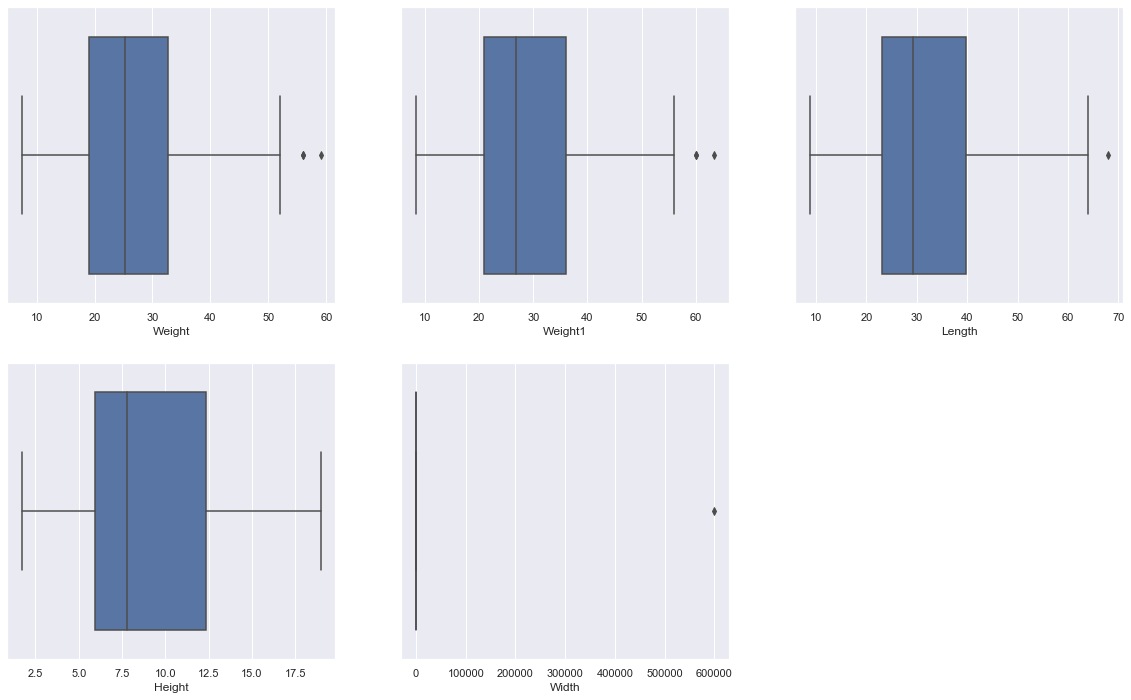

In [20]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(df['Weight'])
plt.subplot(2,3,2)
sns.boxplot(df['Weight1'])
plt.subplot(2,3,3)
sns.boxplot(df['Length'])
plt.subplot(2,3,4)
sns.boxplot(df['Height'])
plt.subplot(2,3,5)
sns.boxplot(df['Width'])
plt.show()



Above box plot showing the outliers

# Removing the Outlier

In [21]:
df[(df['Weight'] >= 55)&(df['Length']>=64)]
df.drop(df[(df['Weight'] >= 55)&(df['Length']>=64)].index, inplace=True)
df.shape

(154, 7)

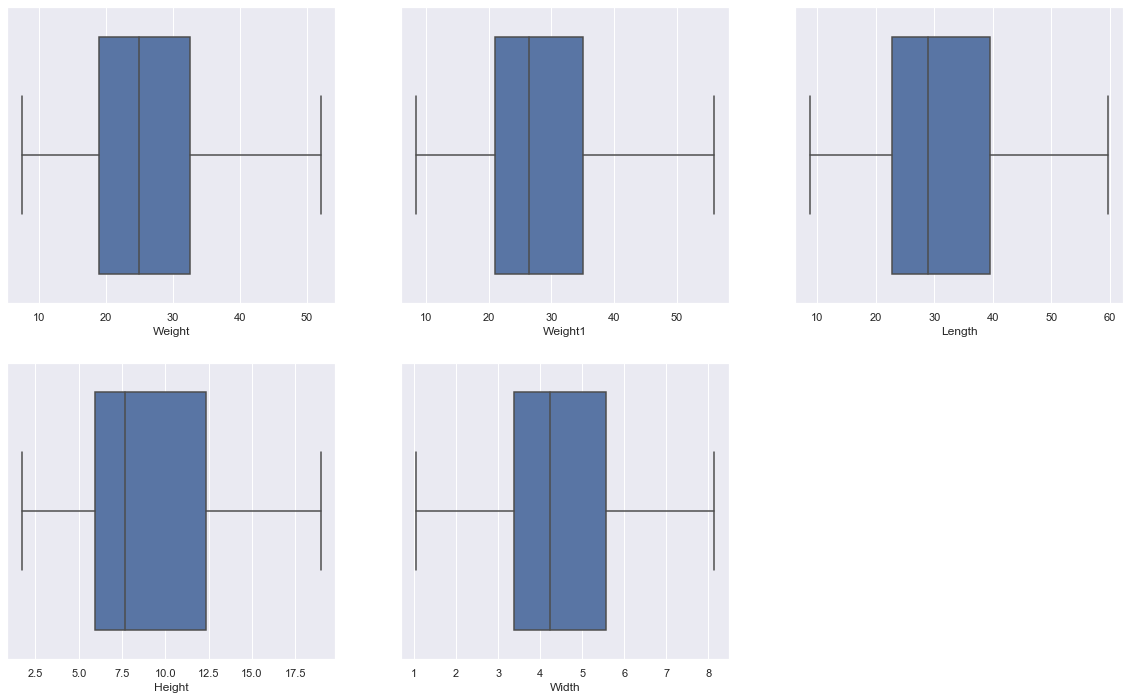

In [22]:
#Generating the box plots to validate the presence of outliers after the previous step
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(df['Weight'])
plt.subplot(2,3,2)
sns.boxplot(df['Weight1'])
plt.subplot(2,3,3)
sns.boxplot(df['Length'])
plt.subplot(2,3,4)
sns.boxplot(df['Height'])
plt.subplot(2,3,5)
sns.boxplot(df['Width'])
plt.show()



Cost of luguagge can not be negative, Hence we can check it and remove if any

In [23]:
#Removing Outliers
# From the descriptive statistics, cost min is 0, so checking how many cost rows are zero
df[df['Cost']==0]

,Cost,Weight,Weight1,Length,Height,Width,Color
40,0.0,19.0,20.5,22.8,6.4752,3.3516,1.0


In [24]:
# Removing rows where cost is 0.
df.drop(df[df['Cost']==0].index,inplace=True)
print(df)

      Cost  Weight  Weight1  Length   Height   Width  Color
0    242.0    23.2     25.4   30.00  11.5200  4.0200    0.0
1    290.0    24.0     26.3   31.20  12.4800  4.3056    1.0
2    340.0    23.9     26.5   31.10  12.3778  4.6961    2.0
3    363.0    26.3     29.0   33.50  12.7300  4.4555    0.0
4    430.0    26.5     29.0   34.25  12.4440  5.1340    1.0
..     ...     ...      ...     ...      ...     ...    ...
154   12.2    11.5     12.2   13.40   2.0904  1.3936    1.0
155   13.4    11.7     12.4   13.50   2.4300  1.2690    2.0
156   12.2    12.1     13.0   13.80   2.2770  1.2558    0.0
157   19.7    13.2     14.3   15.20   2.8728  2.0672    1.0
158   19.9    13.8     15.0   16.20   2.9322  1.8792    2.0

[153 rows x 7 columns]


In [25]:
#data = normalize(data, axis=0)
# Scaling the features by using min max scaling
minmax_scale = preprocessing.MinMaxScaler().fit(df.iloc[:,1:])
df.iloc[:,1:] = minmax_scale.transform(df.iloc[:,1:])
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 158
Data columns (total 7 columns):
Cost       153 non-null float64
Weight     151 non-null float64
Weight1    150 non-null float64
Length     149 non-null float64
Height     153 non-null float64
Width      152 non-null float64
Color      153 non-null float64
dtypes: float64(7)
memory usage: 9.6 KB


      Cost    Weight   Weight1    Length    Height     Width  Color
0    242.0  0.352809  0.357143  0.416503  0.568334  0.418978    0.0
1    290.0  0.370787  0.376050  0.440079  0.624055  0.459235    0.5
2    340.0  0.368539  0.380252  0.438114  0.618123  0.514279    1.0
3    363.0  0.422472  0.432773  0.485265  0.638566  0.480365    0.0
4    430.0  0.426966  0.432773  0.500000  0.621966  0.576004    0.5
..     ...       ...       ...       ...       ...       ...    ...
154   12.2  0.089888  0.079832  0.090373  0.021012  0.048771    0.5
155   13.4  0.094382  0.084034  0.092338  0.040723  0.031208    1.0
156   12.2  0.103371  0.096639  0.098232  0.031842  0.029347    0.0
157   19.7  0.128090  0.123950  0.125737  0.066424  0.143719    0.5
158   19.9  0.141573  0.138655  0.145383  0.069872  0.117219    1.0

[146 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 158
Data columns (total 7 columns):
Cost       146 non-null float64
Weight     146 non-null 

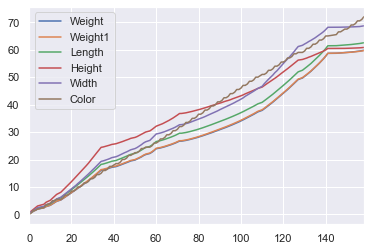

In [26]:
df["Weight"]=df["Weight"].apply(pd.to_numeric, errors='coerce',downcast="float")
df["Weight1"]=df["Weight1"].apply(pd.to_numeric, errors='coerce',downcast="float")
df["Length"]=df["Length"].apply(pd.to_numeric, errors='coerce',downcast="float")
df["Height"]=df["Height"].apply(pd.to_numeric, errors='coerce',downcast="float")
df["Width"]=df["Width"].apply(pd.to_numeric, errors='coerce',downcast="float")
df=df.dropna()
print(df)
df.info()
df.drop('Cost',axis=1).cumsum().plot()

# Task 2	Plotting of various graphs & correlations 

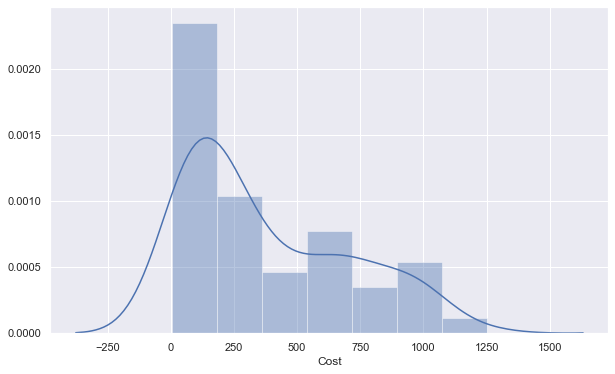

In [27]:
plt.figure(figsize=(10,6))
sns.distplot(df['Cost'])     #Understanding where cost lies

We can see that the cost mostly lies between 0–1000 and the number of bags having cost higher is gradually decreasing as the price is increasing.

# Understanding the influence of each of the metrics on cost and will drop outlier if any 



# Influence of Weight on Cost: Scatter & Joint Plot

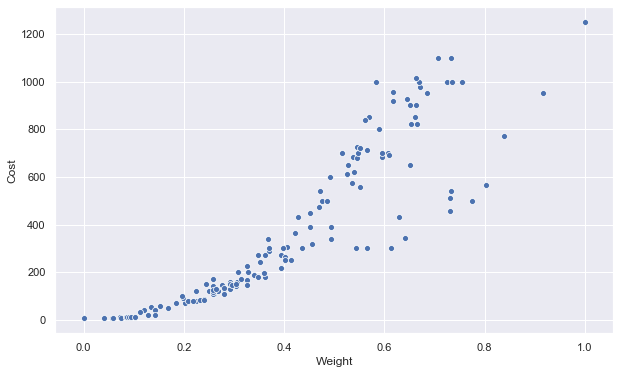

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Weight'],df['Cost'])    

 Seaborn jointplot: Compare Cost and Weight

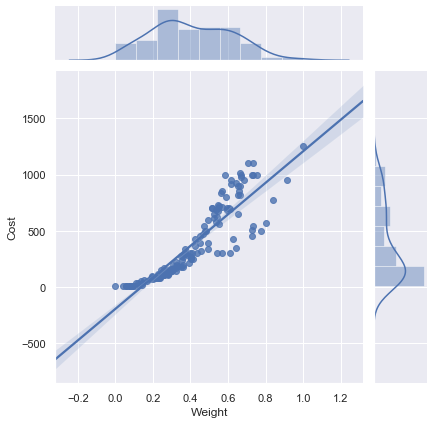

In [29]:
sns.jointplot(x="Weight", y="Cost", kind="reg", data=df)

In [30]:
#By seeing the graph we can see still there is ssome outliers hence dropping certain weight

In [31]:
df.drop(df[df['Cost']>=1200].index,inplace=True)
print(df)



      Cost    Weight   Weight1    Length    Height     Width  Color
0    242.0  0.352809  0.357143  0.416503  0.568334  0.418978    0.0
1    290.0  0.370787  0.376050  0.440079  0.624055  0.459235    0.5
2    340.0  0.368539  0.380252  0.438114  0.618123  0.514279    1.0
3    363.0  0.422472  0.432773  0.485265  0.638566  0.480365    0.0
4    430.0  0.426966  0.432773  0.500000  0.621966  0.576004    0.5
..     ...       ...       ...       ...       ...       ...    ...
154   12.2  0.089888  0.079832  0.090373  0.021012  0.048771    0.5
155   13.4  0.094382  0.084034  0.092338  0.040723  0.031208    1.0
156   12.2  0.103371  0.096639  0.098232  0.031842  0.029347    0.0
157   19.7  0.128090  0.123950  0.125737  0.066424  0.143719    0.5
158   19.9  0.141573  0.138655  0.145383  0.069872  0.117219    1.0

[145 rows x 7 columns]


Checking again Influence of Weight on Cost after removing outlier

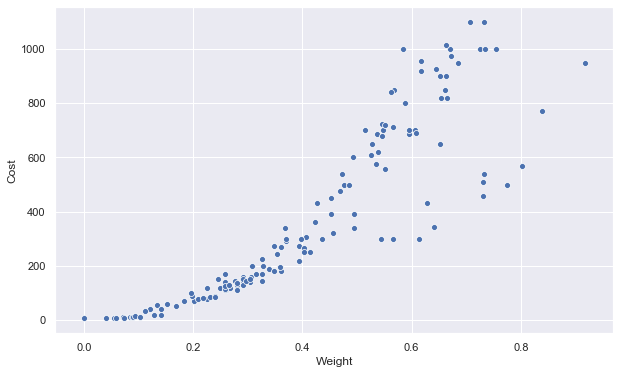

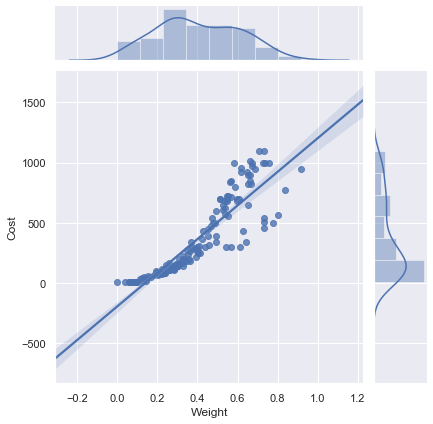

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['Weight'],df['Cost']) 
sns.jointplot(x="Weight", y="Cost", kind="reg", data=df)

# Influence of Length on Cost: Scatter & Joint Plot

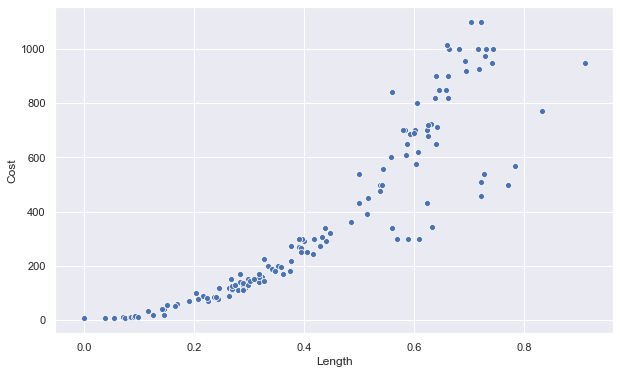

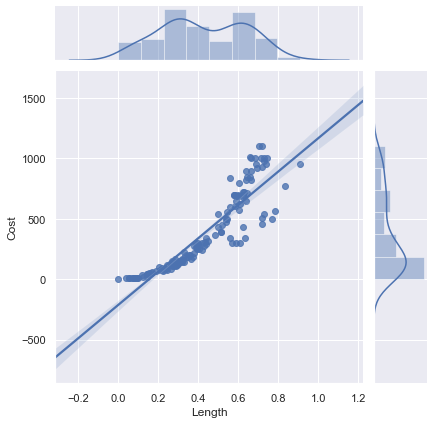

In [33]:

plt.figure(figsize=(10,6))
sns.scatterplot(df['Length'],df['Cost'])  

sns.jointplot(x="Length", y="Cost", kind="reg", data=df)

# Influence of Height  on Cost: Using scatter and joint plot

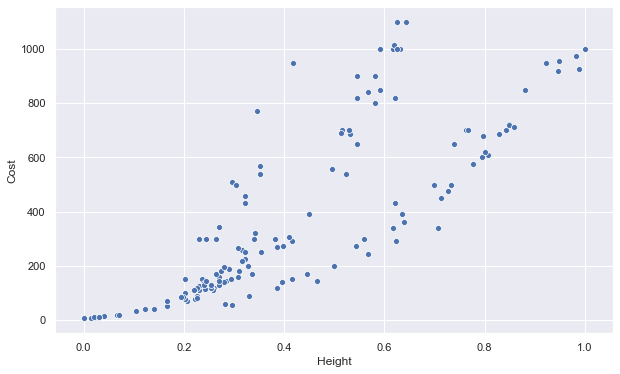

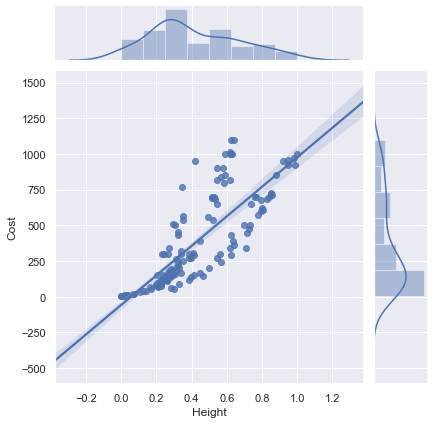

In [34]:

    plt.figure(figsize=(10,6))
sns.scatterplot(df['Height'],df['Cost'])   

sns.jointplot(x="Height", y="Cost", kind="reg", data=df)

# Influence of Width  on Cost:

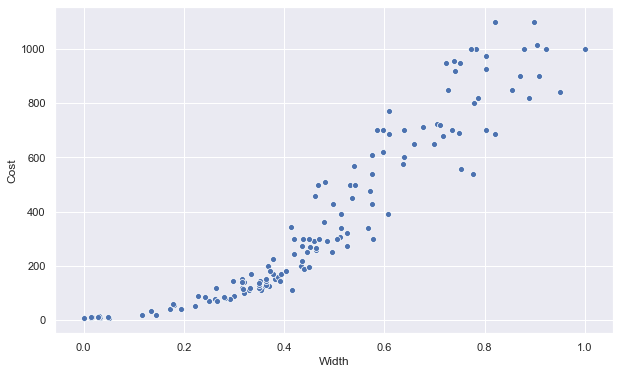

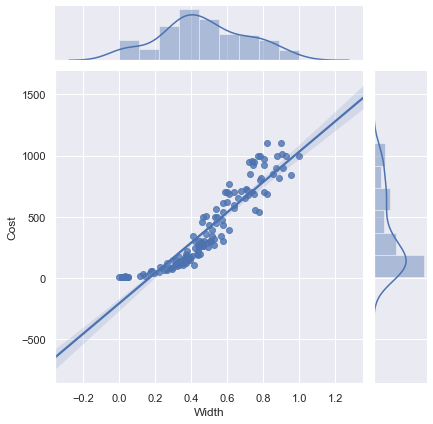

In [35]:

plt.figure(figsize=(10,6))
sns.scatterplot(df['Width'],df['Cost'])  

sns.jointplot(x="Width", y="Cost", kind="reg", data=df)

# Influence of Weight  on Cost:

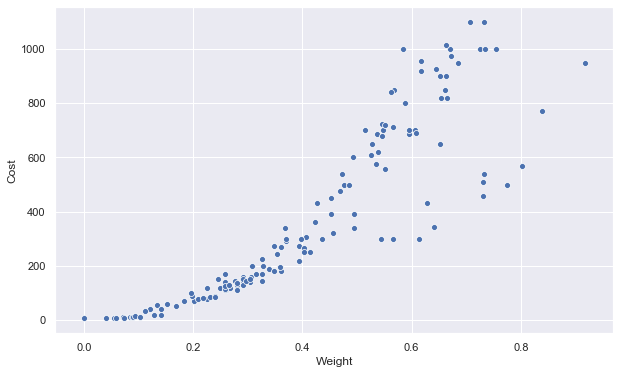

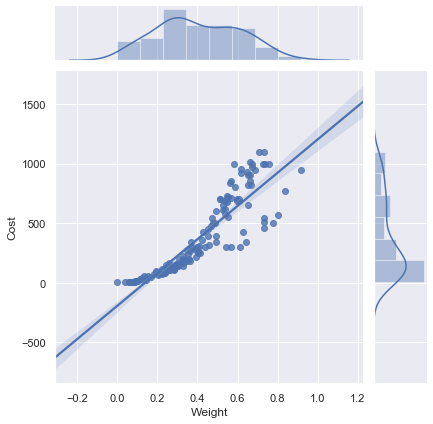

In [36]:

    plt.figure(figsize=(10,6))
sns.scatterplot(df['Weight'],df['Cost'])    

sns.jointplot(x="Weight", y="Cost", kind="reg", data=df)

# Influence of Weight1  on Cost:

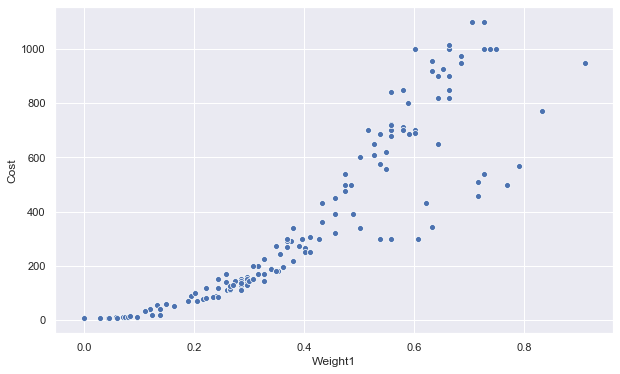

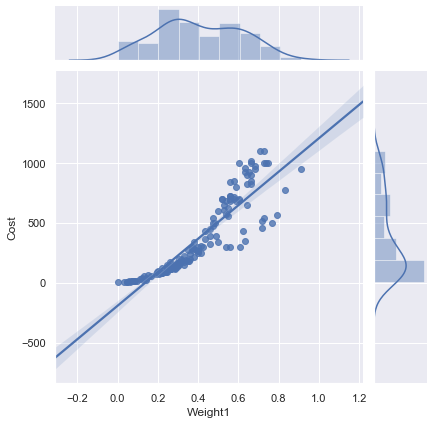

In [37]:

    plt.figure(figsize=(10,6))
sns.scatterplot(df['Weight1'],df['Cost'])   

sns.jointplot(x="Weight1", y="Cost", kind="reg", data=df)

1.4: Check frequency of values in column

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BC4F72688>,
      dtype=object)

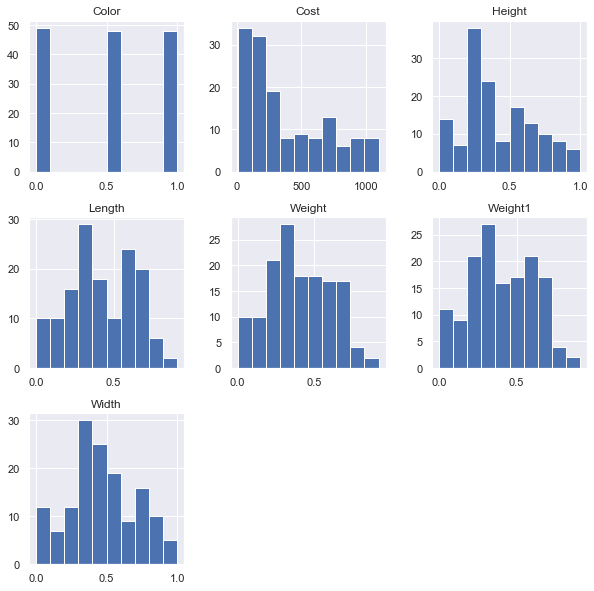

In [38]:
df.hist(figsize=(10,10))

From above histogram looks there is no outlier and we are good with EDA

# Understanding the influence of each of these attributes on the other:

Looking at the pair plots:

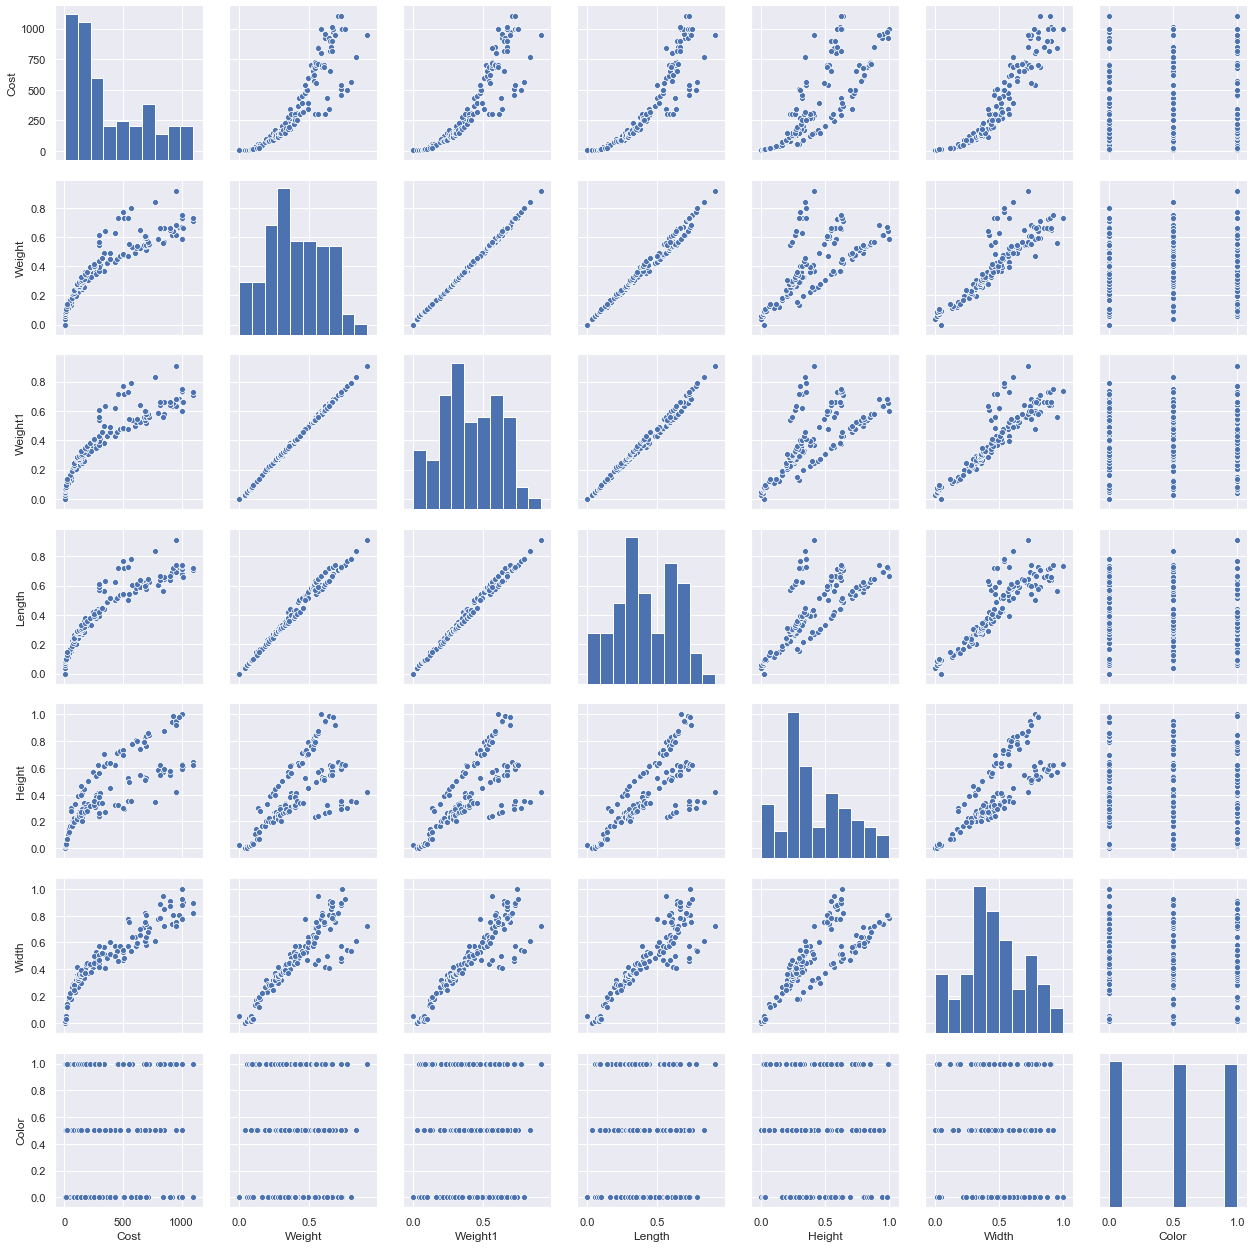

In [39]:
sns.pairplot(df)
plt.show()

# correlation

# Generating the correlation between the attributes:

,Cost,Weight,Weight1,Length,Height,Width,Color
Cost,1.000000,0.893123,0.897111,0.905171,0.816912,0.927182,-0.012563
Weight,0.893123,1.000000,0.999411,0.990813,0.691774,0.892948,-0.013033
Weight1,0.897111,0.999411,1.000000,0.993301,0.707708,0.899411,-0.015901
Length,0.905171,0.990813,0.993301,1.000000,0.768947,0.900026,-0.014149
Height,0.816912,0.691774,0.707708,0.768947,1.000000,0.803824,-0.017469
Width,0.927182,0.892948,0.899411,0.900026,0.803824,1.000000,-0.006940
Color,-0.012563,-0.013033,-0.015901,-0.014149,-0.017469,-0.006940,1.000000


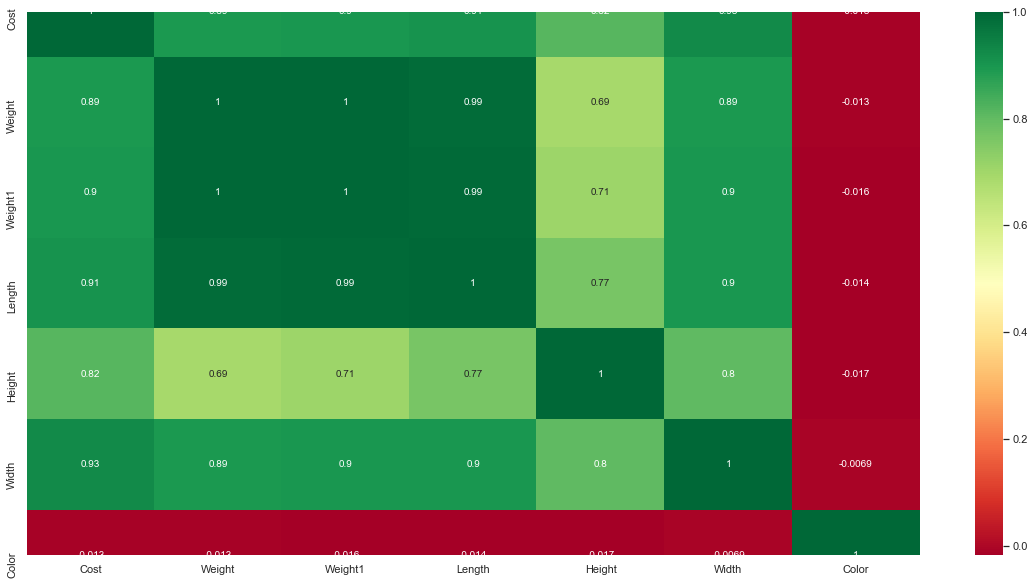

In [40]:
plt.figure(figsize=(20,10))
c=df.corr()
sns.heatmap(c,cmap=plt.cm.RdYlGn, annot=True)
c

In [41]:
# Arrange correlation in ascending order
corr = df.corr()
print(corr.abs().unstack().sort_values(ascending=False))

Color    Color      1.000000
Width    Width      1.000000
Weight   Weight     1.000000
Weight1  Weight1    1.000000
Height   Height     1.000000
Length   Length     1.000000
Cost     Cost       1.000000
Weight   Weight1    0.999411
Weight1  Weight     0.999411
Length   Weight1    0.993301
Weight1  Length     0.993301
Weight   Length     0.990813
Length   Weight     0.990813
Cost     Width      0.927182
Width    Cost       0.927182
Cost     Length     0.905171
Length   Cost       0.905171
         Width      0.900026
Width    Length     0.900026
         Weight1    0.899411
Weight1  Width      0.899411
         Cost       0.897111
Cost     Weight1    0.897111
         Weight     0.893123
Weight   Cost       0.893123
Width    Weight     0.892948
Weight   Width      0.892948
Height   Cost       0.816912
Cost     Height     0.816912
Width    Height     0.803824
Height   Width      0.803824
         Length     0.768947
Length   Height     0.768947
Weight1  Height     0.707708
Height   Weigh

Correlation between feature Weight and Weight1 is too high i.e. 0.996551 because of that need to drop one feature. Weight and Weight1 relation with cost is 0.894028 and 0.900422 respectively. As correlatin of Weight is less with cost so we will drop this feature

In [42]:
df.drop('Weight', axis=1, inplace=True)

Correlation between feature Weight1 and Length is too high i.e. 0.990813 because of that need to drop one feature. Weight1 and Length relation with cost is 0.897111 and 0.905171 respectively. As correlatin of Weight1 is less with cost so we will drop this feature

In [43]:
df.drop('Weight1', axis=1, inplace=True)

Correlation between feature Color and Cost is too low i.e. 0.012563 as a result we can drop this colomn.

In [44]:
df.drop('Color', axis=1, inplace=True)

# Task 3 & 4 	Model Building using Multiple Linear Regression and Evaluation of R Squared, RMSE and MSE for the model

# Building Regression Models- OLS Approch- Linear regression


# Training and Testing Data

In [45]:
y = df['Cost']
X = df[["Length", "Height", "Width"]]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[ 0.8352352 ,  0.48656729,  1.4709101 ],
       [ 1.42410018,  0.73398908,  1.71343212],
       [ 0.90171996,  1.5784647 ,  0.54126191],
       [-0.28550781, -0.30067528, -0.30680216],
       [-0.98834665, -0.33106784, -0.98893937],
       [ 0.08490725,  0.83866933,  0.19849119],
       [-0.57994029,  0.21731556, -0.70480357],
       [ 0.67377223,  1.19978093,  0.41959004],
       [ 0.81623956, -0.67658325,  0.01554318],
       [ 0.87322649,  0.47574641,  1.11910056],
       [ 0.97770254, -0.35816708,  0.12829362],
       [ 1.06318293,  0.54669375,  0.96555806],
       [-0.66542069, -0.06468599, -0.62421724],
       [-0.21902305, -0.4060142 , -0.26524708],
       [-1.55821597, -1.53740781, -1.8207453 ],
       [ 1.15816116,  0.83937504,  1.8221327 ],
       [-0.12404483, -0.38705413, -0.01345146],
       [-0.30450345, -0.52965452, -0.06979734],
       [ 0.38408865,  0.45433989,  1.29365538],
       [ 1.54757186,  2.0726496 ,  1.1812571 ],
       [-1.30177478, -0.46225925, -1.192

Training the Model
Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Print out the coefficients of the model

In [47]:
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)


Coefficients: 
 [110.97487641  40.00430639 163.91145839]
Intercept: 
 371.86034482758623


In [48]:
predictions = lm.predict( X_test)

# ** Create a scatterplot of the real test values versus the predicted values. **

Text(0, 0.5, 'Predicted Y')

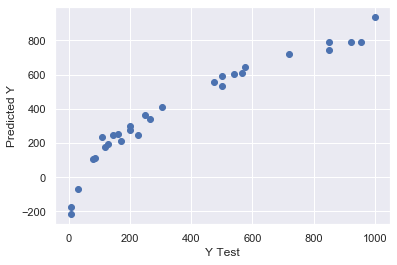

In [49]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model
Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [50]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2:',metrics.explained_variance_score(y_test, predictions))

MAE: 83.56882114198218
MSE: 9374.030129457147
RMSE: 96.8195751356984
R2: 0.9029905148770595


Accuracy of model using OLS is approx. 90.29%

# Observation of OLS approach- Interpretation

# Residuals
You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data.

Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().

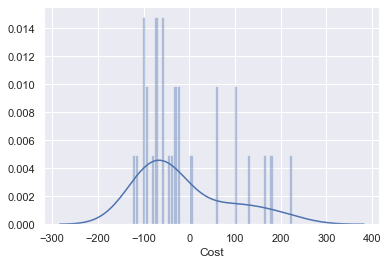

In [51]:
sns.distplot((y_test-predictions),bins=50);

# Gradient Descent


# Solution for Gradient Descent with at least two learning parameters 
(Try GD method with two different learning parameters and the compare them to identify the ignorance of learning parameter) 


# Creating Various Reusable Methods 

In [52]:
X = df.iloc[:,1:].values
y = df.iloc[:,0:1].values
# Splitting the dataset by train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


batch_size = 10
theta = np.zeros((df.shape[1], 1))
s_theta = np.zeros((df.shape[1], 1))
mb_theta = np.zeros((df.shape[1], 1))

class GradientDescent:
    ''' Gradient Descent class which contains batch, mini-batch and stochastic gradient '''
    
    def __init__(self):
        ''' Constructor of Gradient Descent'''
        print('GradientDescent Class initiated')
        
    def get_metrics(self, x, y, theta):
        ''' To calculate the metrics like MAE, MSE, RMSE, R2 '''
        
        y_pred = [(theta[1] * x1) + (theta[2] * x2)+ (theta[3] * x3)+ theta[0]
                       for x1,x2,x3, in x]
        mae = mean_absolute_error(y,y_pred)
        mse = mean_squared_error(y,y_pred)
        metrics = "MAE = {0}, MSE = {1}, RMSE = {2}, R2 = {3}".format(mae, mse, math.sqrt(mse), r2_score(y,y_pred))
        return metrics
    
    def h (self, theta, X) :
        ''' hypotheseis function to calculate the equation '''
        tempX = np.ones((X.shape[0], X.shape[1] + 1))
        tempX[:,1:] = X
        res = np.matmul(tempX, theta)
        return res
    
    def loss (self, theta, X, Y) :
        ''' Loss function to find the difference between actual and predicted values '''
        return np.average(np.square(Y - self.h(theta, X))) / 2
    
    def gradient(self, theta, X, Y):
        tempX = np.ones((X.shape[0], X.shape[1] + 1))
        tempX[:,1:] = X
        d_theta = - np.average((Y - self.h(theta, X)) * tempX, axis= 0)
        d_theta = d_theta.reshape((d_theta.shape[0], 1))
        return d_theta
    
    def batch_gradient_descent (self, theta, X, Y, learning_rate, max_iteration, gap):
        ''' Gradient or Batch function to calculate the gradient for the whole dataset '''
        cost = np.zeros(max_iteration)
        for i in range(max_iteration):
            d_theta = self.gradient (theta, X, Y)
            theta = theta - learning_rate * d_theta
            cost[i] = self.loss(theta, X, Y)
            if i % gap == 0 :
                print ('iteration : ', i, ' loss : ', self.loss(theta, X, Y))
        return theta, cost

    def minibatch_gradient_descent (self, theta, X, Y, learning_rate, max_iteration, batch_size, gap):
        ''' Mini Batch Gradient Function to calculate the gradient by splitting the dataset by multiple batches '''
        cost = np.zeros(max_iteration)
        for i in range(max_iteration) :
            for j in range(0, X.shape[0], batch_size):
                d_theta = self.gradient(theta, X[j:j+batch_size,:], Y[j:j+batch_size,:])
                theta = theta - learning_rate * d_theta
            cost[i] = self.loss(theta, X, Y)
            if i % gap == 0 :
                print ('iteration : ', i, ' loss : ', self.loss(theta, X, Y)) 
        return theta, cost
    
    def stochastic_gradient_descent (self, theta, X, Y, learning_rate, max_iteration, gap):
        ''' Stochastic Gradient Function to calculate the gradient for all rows by looping the dataset '''
        cost = np.zeros(max_iteration)
        for i in range(max_iteration) :
            for j in range(X.shape[0]):
                d_theta = self.gradient(theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
                theta = theta - learning_rate * d_theta    
            cost[i] = self.loss(theta, X, Y)
            if i % gap == 0 :
                print ('iteration : ', i, ' loss : ', self.loss(theta, X, Y))
        return theta, cost

# GD With learning rate one

GradientDescent Class initiated
iteration :  0  loss :  110289.13311006111
iteration :  1000  loss :  10316.072494524698
iteration :  2000  loss :  6567.010656908088
iteration :  3000  loss :  5786.663667904708
iteration :  4000  loss :  5565.175054040911
[[-226.96497022]
 [ 483.79925377]
 [ 342.19807989]
 [ 534.91420065]]


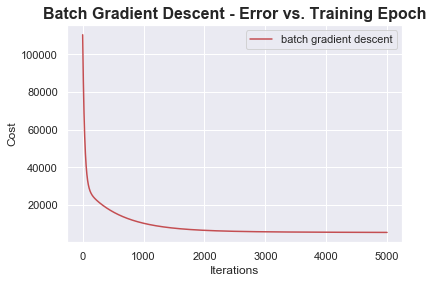

Batch Gradient Descent
MAE = 84.7387466864737, MSE = 10927.177884718454, RMSE = 104.53314251814328, R2 = 0.8877394878321313
MAE = 87.78574755627506, MSE = 11559.313608169055, RMSE = 107.51424839605704, R2 = 0.8928711376359066


In [53]:
# learning rate one
learning_rate = 0.01
max_iteration = 5000

theta = np.zeros((df.shape[1], 1))
batch_size = 10

gradient_obj = GradientDescent()

theta, cost = gradient_obj.batch_gradient_descent(theta, X_train, y_train, learning_rate, max_iteration, 1000)
print(theta)

#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.legend(loc='upper right', labels=['batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Batch Gradient Descent - Error vs. Training Epoch', fontsize=16, fontweight='bold')
plt.show()

print('Batch Gradient Descent')
print(gradient_obj.get_metrics(X_train,y_train,theta ))
print(gradient_obj.get_metrics(X_test,y_test,theta ))

# GD with learning rate two

GradientDescent Class initiated
iteration :  0  loss :  100059.09932901015
iteration :  1000  loss :  5463.035968835871
iteration :  2000  loss :  5266.719311073933
iteration :  3000  loss :  5217.667543583073
iteration :  4000  loss :  5205.083855459306
iteration :  5000  loss :  5201.825981803126
iteration :  6000  loss :  5200.963156317037
iteration :  7000  loss :  5200.722084406256
iteration :  8000  loss :  5200.646771185954
iteration :  9000  loss :  5200.6184623327945
[[-245.36991765]
 [ 588.63845638]
 [ 196.68355614]
 [ 608.72094652]]


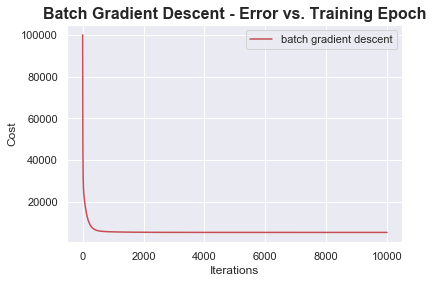

Batch Gradient Descent
MAE = 82.81482554009253, MSE = 10401.210526124392, RMSE = 101.98632519178437, R2 = 0.8931430207188729
MAE = 88.99618357248853, MSE = 11391.62102513514, RMSE = 106.7315371628046, R2 = 0.8944252710608034


In [54]:
# learning rate two
learning_rate = 0.05
max_iteration = 10000

theta = np.zeros((df.shape[1], 1))
batch_size = 10

gradient_obj = GradientDescent()

theta, cost = gradient_obj.batch_gradient_descent(theta, X_train, y_train, learning_rate, max_iteration, 1000)
print(theta)

#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.legend(loc='upper right', labels=['batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Batch Gradient Descent - Error vs. Training Epoch', fontsize=16, fontweight='bold')
plt.show()

print('Batch Gradient Descent')
print(gradient_obj.get_metrics(X_train,y_train,theta ))
print(gradient_obj.get_metrics(X_test,y_test,theta ))

# Mini Batch Gradient Descent

iteration :  0  loss :  41197.07104057432
iteration :  1000  loss :  5201.361977977968
iteration :  2000  loss :  5201.316754008082
iteration :  3000  loss :  5201.315019841273
iteration :  4000  loss :  5201.314859593078
iteration :  5000  loss :  5201.31484384642
iteration :  6000  loss :  5201.314842290011
iteration :  7000  loss :  5201.314842136087
iteration :  8000  loss :  5201.314842120861
iteration :  9000  loss :  5201.3148421193555

Value of Theta : 
 [[-245.36991765]
 [ 588.63845638]
 [ 196.68355614]
 [ 608.72094652]]


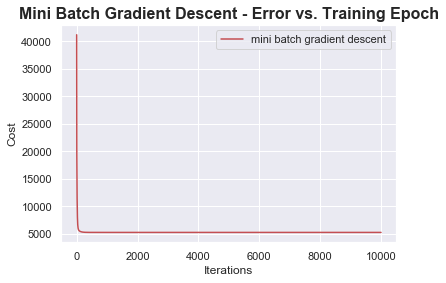

In [55]:
mb_learning_rate = 0.05
mb_max_iteration = 10000

batch_size = 10
mb_theta = np.zeros((df.shape[1], 1))

mb_theta, mb_cost = gradient_obj.minibatch_gradient_descent (mb_theta, X_train, y_train,mb_learning_rate, mb_max_iteration, batch_size, 1000)
print('\nValue of Theta : \n', theta)

#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(mb_max_iteration), mb_cost, 'r')  
ax.legend(loc='upper right', labels=['mini batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Mini Batch Gradient Descent - Error vs. Training Epoch', fontsize=16, fontweight='bold')
plt.show()

In [56]:
print('Mini Batch Gradient Descent')
print(gradient_obj.get_metrics(X_train,y_train,mb_theta ))
print(gradient_obj.get_metrics(X_test,y_test,mb_theta ))

Mini Batch Gradient Descent
MAE = 82.59838173208328, MSE = 10402.629684238414, RMSE = 101.9932825446775, R2 = 0.8931284409784853
MAE = 88.76440249170822, MSE = 11396.524943519347, RMSE = 106.7545078369965, R2 = 0.8943798227569132


# Stochastic Gradient Descent

In [57]:
s_learning_rate = 0.05
s_max_iteration = 1000
s_theta, s_cost = gradient_obj.stochastic_gradient_descent(s_theta, X_train, y_train, s_learning_rate, s_max_iteration, 1000)

iteration :  0  loss :  15730.852496412908


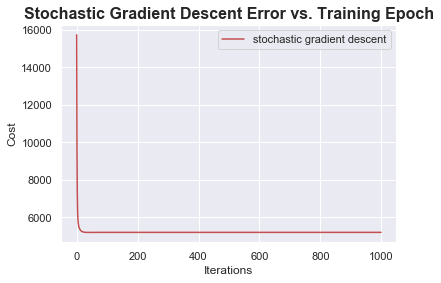

In [58]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(s_max_iteration), s_cost, 'r')  
ax.legend(loc='upper right', labels=['stochastic gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Stochastic Gradient Descent Error vs. Training Epoch', fontsize=16, fontweight='bold')
plt.show()

In [59]:
print('Stochastic Gradient Descent')
print(gradient_obj.get_metrics(X_train,y_train,s_theta ))
print(gradient_obj.get_metrics(X_test,y_test,s_theta ))

Stochastic Gradient Descent
MAE = 82.72136072205302, MSE = 10408.888157073254, RMSE = 102.02395874045102, R2 = 0.8930641444718082
MAE = 89.21764201485432, MSE = 11470.713180264078, RMSE = 107.1014153980426, R2 = 0.8936922645097138


##### Efficiency of Gradient Descent and Mini Batch Gradient Descent model with two learning rate is as below
**Gradient Descent**
- Learning rate = 0.01 max_iteration = 5000
- Accuracy of model is approx. 89.28% 
- PFB details values
- MAE = 87.78574755627506, MSE = 11559.313608169055, RMSE = 107.51424839605704, R2 = 0.8928711376359066


- Learning rate = 0.05 max_iteration = 10000
- Accuracy of model is approx. 89.28% 
- PFB details values
-MAE = 88.99618357248853, MSE = 11391.62102513514, RMSE = 106.7315371628046, R2 = 0.8944252710608034

**Mini Batch Gradient Descent**
- Learning rate = 0.05 Max iteration = 10000
- Model accuracy is apporx. 89.43%
- PFB details values
- MAE = 88.76440249170822, MSE = 11396.524943519347, RMSE = 106.7545078369965, R2 = 0.8943798227569132


**Stochastic Gradient Descent**
- Learning rate = 0.05 Max iteration = 1000
- Model accuracy is apporx. 89.36%
- PFB details values
- MAE = 89.21764201485432, MSE = 11470.713180264078, RMSE = 107.1014153980426, R2 = 0.8936922645097138

# Observations/ Conclusions:-

# Machine Learning model performance

# Best ML model based on accuracy parameter

So we can say, OLS(Linear Regression) is the best model in this case which is giving accuracy of approx. 90.29%
which is better than  Gradient Descent,Mini Batch Gradient Descent and Stochastic Gradient Descent.